In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
data =  pd.read_csv("news_dataset_for_proj_081020.csv", encoding='iso-8859-1')
data.head()

,Unnamed: 0,title,text,label
0,1,Muslims BUSTED: They Stole Millions In Govât...,They should pay all the back all the money plu...,1
1,2,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,1
2,3,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : Fox News Sunday reported this morn...,1
3,4,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Kayla Mueller was a prisoner and tortured by I...,1
4,5,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,HEALTHCARE REFORM TO MAKE AMERICA GREAT AGAIN ...,1


In [3]:
# Splitting training and testing data
training,testing = train_test_split(data)
# Training set: 10051
# Testing set: 3351

In [4]:
# Separating the true and fake data within the training set
true = training[training['label'] == 0]
fake = training[training['label'] == 1]

## Classifiying based on TITLE 

In [5]:
true_title = {}
fake_title= {}
true_dict = {}
fake_dict = {}

In [6]:
# This function counts how many times a word appears in the text
def extract_words(category,dictionary):
    for entry in category['title']: # Can change to title, text or both
        words = entry.split()
        for word in words:
            lower_word = word.lower()
            if word in dictionary:
                dictionary[lower_word] += 1
            else:
                dictionary[lower_word] = 1
    return dictionary

In [7]:
true_dict = extract_words(true, true_title)
fake_dict = extract_words(fake, fake_title)


In [8]:
true_length = len(true) #3119
fake_length = len(fake) #6932

In [9]:
def count_to_prob(dictionary,length):
    for term in dictionary:
        dictionary[term] = dictionary[term]/length
    return dictionary

true_prob = count_to_prob(true_dict, true_length)
fake_prob = count_to_prob(fake_dict, fake_length)

In [10]:
def calculate_probability(dictionary,X,initial):
    X.translate(str.maketrans('', '', string.punctuation))
    X = X.lower()
    split = X.split()
    probability = initial
    for term in split:
        if term in dictionary:
            probability *= dictionary[term]
            #print(term,dictionary[term])
    return probability

In [11]:
def classifier(X):
    p_fake = calculate_probability(fake_prob,X,1)
    p_true = calculate_probability(true_prob,X,1)
    if p_true > p_fake:
        #print("REAL NEWS")
        return(0)
    else:
        #print("FAKE NEWS")
        return(1)
    
#classifier('trump is the best')  

### Testing the classifier on the testing dataset

In [12]:
# Iterating the classifier function into the testing dataset 
ans = []
for i in range(0,len(testing)):
    x = testing[:i]['title']
    x_label = classifier(str(x))
    ans.append(x_label)   

In [17]:
testing['classified_label'] = ans
testing

<ipython-input-17-2093fd27a4f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['classified_label'] = ans


,Unnamed: 0,title,text,label,classified_label
11274,19851,CCTV shows illegal migrants running for Spain'...,Spanish police have released video showing h...,0,1
2146,2150,We Found It! The Interview That George Soros D...,. We Found It! The Interview That George Soros...,1,0
6564,6568,JUDGE JEANINE RIPS DEMOCRATS: What Have Democr...,The truth is what you get with this judge! We ...,1,0
2798,2802,Vladivostok to Become a Pivotal Hub of the Asi...,"Region: Russia in the World In August, 2016 th...",1,0
7909,7913,DRUG-RESISTANT SUPERBUG That Doctors Warned Of...,American doctors have warned about a drug-resi...,1,0
...,...,...,...,...,...
11405,21161,Autumn Statement: Buzzword bets on Osborne spe...,The odds on the most likely words to by utte...,0,0
9895,60610,Problems of poverty in Germany,Throughout the financial crisis in the euroz...,0,0
1423,1427,Comment on Unprecedented letter from Chair of ...,"Posted on October 28, 2016 by Dr. Eowyn | 3 Co...",1,0
3457,3461,Thievesâ Picnic at Trust Bank: Russiaâs Bi...,by Lambert Strether Lambert here: John LeCarrÃ...,1,0


In [41]:
accuracy_score(testing['label'], testing['classified_label'])

0.3139361384661295

In [42]:
cm_title = confusion_matrix(testing['label'], testing['classified_label'])
cm_title

array([[1035,   20],
       [2279,   17]])

In [43]:
cm_title = pd.DataFrame(cm_title, index=[0,1], columns=[0,1])
cm_title.index.name = 'Actual'
cm_title.columns.name = 'Predicted'

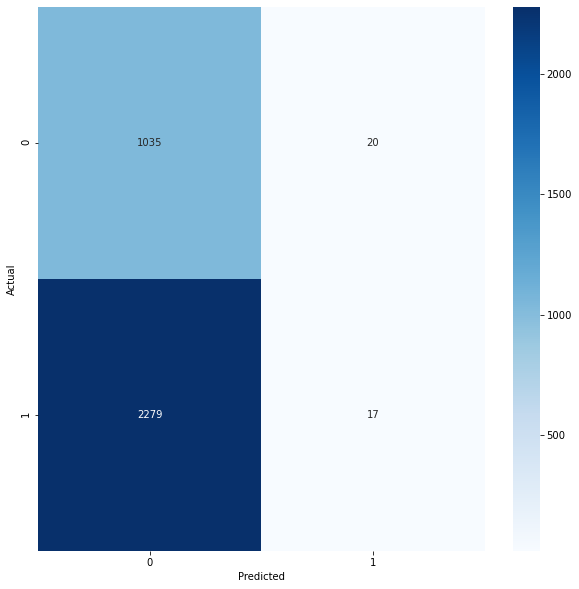

In [44]:
plt.figure(figsize = (10,10))
sns.heatmap(cm_title,cmap= "Blues",annot = True, fmt='')

## Classifying based on TEXT

In [19]:
true_text = {}
fake_text= {}
true_dict1 = {}
fake_dict1 = {}

In [20]:
# This function counts how many times a word appears in the text
def extract_words1(category,dictionary):
    for entry in category['text']: # Can change to title, text or both
        words = str(entry).split()
        for word in words:
            lower_word = word.lower()
            if word in dictionary:
                dictionary[lower_word] += 1
            else:
                dictionary[lower_word] = 1
    return dictionary

In [21]:
true_dict1 = extract_words1(true, true_text)
fake_dict1 = extract_words1(fake, fake_text)

In [22]:
def count_to_prob(dictionary,length):
    for term in dictionary:
        dictionary[term] = dictionary[term]/length
    return dictionary

true_prob1 = count_to_prob(true_dict1, true_length)
fake_prob1 = count_to_prob(fake_dict1, fake_length)

In [23]:
def calculate_probability(dictionary,X,initial):
    X.translate(str.maketrans('', '', string.punctuation))
    X = X.lower()
    split = X.split()
    probability = initial
    for term in split:
        if term in dictionary:
            probability *= dictionary[term]
            #print(term,dictionary[term])
    return probability

In [28]:
def classifier1(X):
    p_fake = calculate_probability(fake_prob1,X,1)
    p_true = calculate_probability(true_prob1,X,1)
    if p_true > p_fake:
        #print("REAL NEWS")
        return(0)
    else:
        #print("FAKE NEWS")
        return(1)
    
#classifier('trump is the best') 

### Testing the classifier on the testing dataset

In [29]:
# Iterating the classifier function into the testing dataset 
answer = []
for i in range(0,len(testing)):
    x = testing[:i]['text']
    x_label = classifier1(str(x))
    answer.append(x_label)   

In [30]:
testing['classified_label_forTEXT'] = answer
testing

<ipython-input-30-8ff8ea563ad9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['classified_label_forTEXT'] = answer


,Unnamed: 0,title,text,label,classified_label,classified_label_forTEXT
11274,19851,CCTV shows illegal migrants running for Spain'...,Spanish police have released video showing h...,0,1,1
2146,2150,We Found It! The Interview That George Soros D...,. We Found It! The Interview That George Soros...,1,0,0
6564,6568,JUDGE JEANINE RIPS DEMOCRATS: What Have Democr...,The truth is what you get with this judge! We ...,1,0,0
2798,2802,Vladivostok to Become a Pivotal Hub of the Asi...,"Region: Russia in the World In August, 2016 th...",1,0,0
7909,7913,DRUG-RESISTANT SUPERBUG That Doctors Warned Of...,American doctors have warned about a drug-resi...,1,0,0
...,...,...,...,...,...,...
11405,21161,Autumn Statement: Buzzword bets on Osborne spe...,The odds on the most likely words to by utte...,0,0,0
9895,60610,Problems of poverty in Germany,Throughout the financial crisis in the euroz...,0,0,0
1423,1427,Comment on Unprecedented letter from Chair of ...,"Posted on October 28, 2016 by Dr. Eowyn | 3 Co...",1,0,0
3457,3461,Thievesâ Picnic at Trust Bank: Russiaâs Bi...,by Lambert Strether Lambert here: John LeCarrÃ...,1,0,0


In [31]:
accuracy_score(testing['label'], testing['classified_label_forTEXT'])

0.3142345568487019

In [38]:
cm_text = confusion_matrix(testing['label'], testing['classified_label_forTEXT'])
cm_text

array([[1034,   21],
       [2277,   19]])

In [39]:
cm_text = pd.DataFrame(cm_text, index=[0,1], columns=[0,1])
cm_text.index.name = 'Actual'
cm_text.columns.name = 'Predicted'

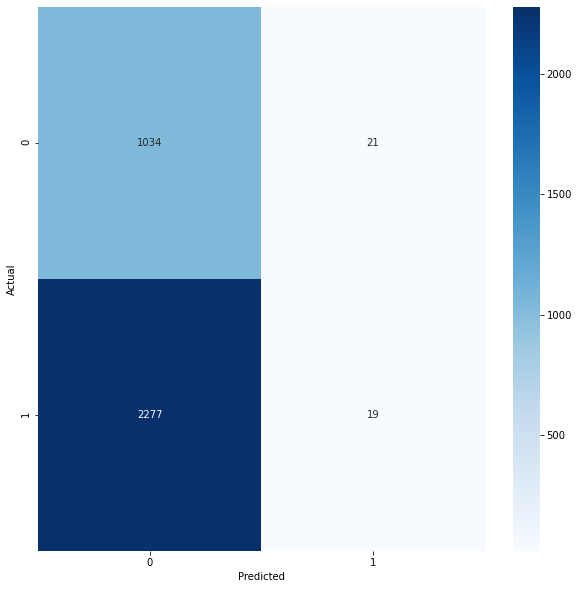

In [40]:
plt.figure(figsize = (10,10))
sns.heatmap(cm_text,cmap= "Blues",annot = True, fmt='')